# Model Devolopment 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df=pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [5]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [6]:
df.dtypes

Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [7]:
df._get_numeric_data().corr()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
Category,1.000000,-0.114174,-0.043378,0.232425,-0.285392,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.117608,0.117608
GPU,-0.114174,1.000000,-0.199549,0.145388,0.154251,0.291439,0.218973,0.094288,0.262853,0.288298,-0.089582,0.089582
OS,-0.043378,-0.199549,1.000000,0.016954,0.146695,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.172891,-0.172891
CPU_core,0.232425,0.145388,0.016954,1.000000,0.041092,0.242722,0.473075,0.400015,0.068599,0.459398,0.003837,-0.003837
Screen_Size_inch,-0.285392,0.154251,0.146695,0.041092,1.000000,-0.000948,0.018194,0.119699,0.797534,-0.110644,0.342912,-0.342912
CPU_frequency,-0.053414,0.291439,0.050407,0.242722,-0.000948,1.000000,0.226736,0.035557,0.066522,0.366666,0.055273,-0.055273
RAM_GB,0.030127,0.218973,-0.074625,0.473075,0.018194,0.226736,1.000000,0.361469,0.055068,0.549297,0.017913,-0.017913
Storage_GB_SSD,0.038246,0.094288,0.007751,0.400015,0.119699,0.035557,0.361469,1.000000,0.112519,0.243421,0.061402,-0.061402
Weight_pounds,-0.381032,0.262853,0.120858,0.068599,0.797534,0.066522,0.055068,0.112519,1.000000,-0.050312,0.117909,-0.117909
Price,0.286243,0.288298,-0.221730,0.459398,-0.110644,0.366666,0.549297,0.243421,-0.050312,1.000000,-0.021075,0.021075


In [34]:
xdata=df.select_dtypes(include=['int64','float64']).drop(columns=['Price'])
ydata=df[['Price']]

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.5,random_state=42)

In [36]:
len(xtrain)

190

In [37]:
lr=LinearRegression()

In [38]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [39]:
lr.coef_

array([[ 1.58764839e+02,  1.32822018e+02, -5.03357408e+02,
         7.53395686e+01, -8.43083491e+01,  1.00103973e+03,
         9.72775651e+01,  1.66233672e-01,  6.11983626e+01,
         3.82131154e+01, -3.82131154e+01]])

In [40]:
lr.intercept_

array([161.71645742])

In [41]:
predict=lr.predict(xtest)

In [43]:
lr.score(xtrain,ytrain)

0.5300205910558886

In [44]:
lr.score(xtest,ytest)

0.2613413561462621

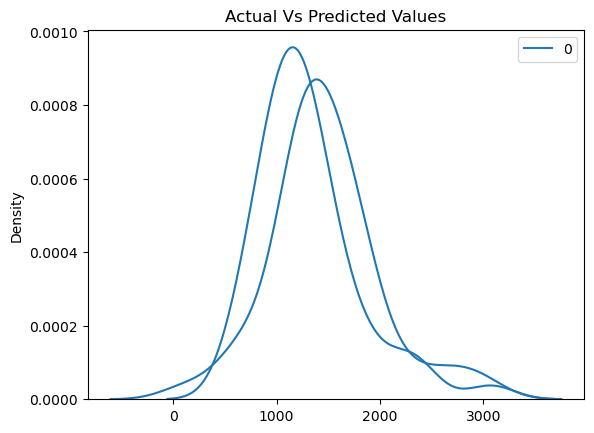

In [48]:
sns.kdeplot(ytest,color='blue',label='Actual Values')
sns.kdeplot(predict,color='red',label='Predicted Values Using Test Data')
plt.title('Actual Vs Predicted Values')
plt.show()

In [72]:
Rcross=cross_val_score(lr,xdata[['CPU_frequency']],ydata,cv=4)

In [73]:
Rcross

array([-0.82012763,  0.10035872,  0.11202939, -0.03662978])

In [74]:
Rcross.mean()

-0.16109232388595113

In [75]:
Rcross.std()

0.384957978666471

In [65]:
lm=LinearRegression()


In [68]:
result_test=[]
result_train=[]
for i in range(6):
    poly=PolynomialFeatures(degree=i)
    lm.fit(poly.fit_transform(xtrain[['CPU_frequency']]),ytrain)
    result_test.append(lm.score(poly.fit_transform(xtrain[['CPU_frequency']]),ytrain))
    result_train.append(lm.score(poly.fit_transform(xtest[['CPU_frequency']]),ytest))    

In [69]:
result_test

[0.0,
 0.11395149912674218,
 0.22761852101412272,
 0.27849821504185934,
 0.3003370999205962,
 0.3438818442411745]

In [70]:
result_train

[-0.000532575733761087,
 0.13969222684811833,
 0.24750535783559513,
 0.24829351555278178,
 0.24614042442102302,
 0.23272057889701603]

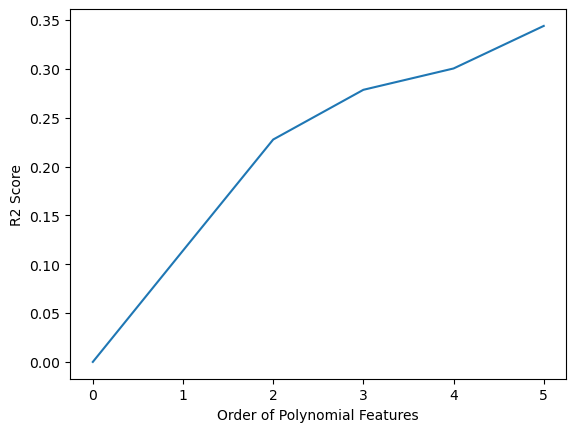

In [71]:
plt.plot(range(6),result_test)
plt.xlabel('Order of Polynomial Features')
plt.ylabel('R2 Score')
plt.show()

### Ridge Regression

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline


In [92]:
alphas=np.arange(0,1,0.001)
result_score=[]
for alpha in alphas :
  input=[('polynomial',PolynomialFeatures(degree=2,include_bias=False)),('model',Ridge(alpha=alpha))]
  pipe=Pipeline(input)
  pipe.fit(xtrain[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']],ytrain)
  result_score.append(pipe.score(xtest[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']],ytest))


In [93]:
max(result_score)

0.3356428692355332

(0.0, 1.0)

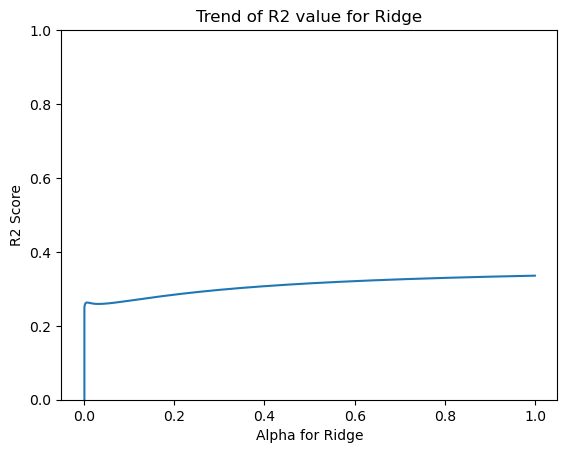

In [95]:
plt.plot(alphas,result_score)
plt.xlabel('Alpha for Ridge')
plt.ylabel('R2 Score')
plt.title('Trend of R2 value for Ridge')
plt.ylim(0,1)

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
parameters=[{'alpha':[0.0001,0.001,0.01,0.1,1,10]}]
Grid1=GridSearchCV(Ridge(),parameters,cv=4)

In [98]:
Grid1.fit(xtrain[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], ytrain)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [99]:
estimate=Grid1.best_estimator_

In [100]:
estimate

Ridge(alpha=1)

In [102]:
estimate.score(xtest[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']],ytest)

0.5260771867603466